In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading Reviews to Dataframe...
print('Loading reviews...',end='')
df = pd.read_csv('train.csv')
print('[ok]')
print('Loaded {:,} reviews' .format(len(df)))

Loading reviews...[ok]
Loaded 426,340 reviews


In [7]:
df.columns #Deciding on coumns we need

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
""" 
We Found relatively Small number of NAN onject in the dataset  in both TEXT and Summary features
wE will replace with '' and drop the UN-NEEDED columns for now
"""
df.Summary.fillna('', inplace=True)
df.Text.fillna('', inplace=True)
df.drop(['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','ProductId'],axis=1,inplace=True)

In [9]:
df.columns

Index(['Score', 'Summary', 'Text'], dtype='object')

# 1- Data Exploration and Visualization: (10%)
Provide an initial step to inspect, visualize and analyse the different attributes in your data set.
Document your findings and make conclusions for your next steps

In [10]:
#Concatinating TEXT and Summary features as per the DR. example. Which is OK as I didnt find obvoius correlation
df['text']=df['Summary']+' '+df['Text'] 
df.drop(['Summary','Text'],axis=1,inplace=True)
df['length']=df['text'].str.len() 

In [11]:
df.columns

Index(['Score', 'text', 'length'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD45200B48>,
      dtype=object)

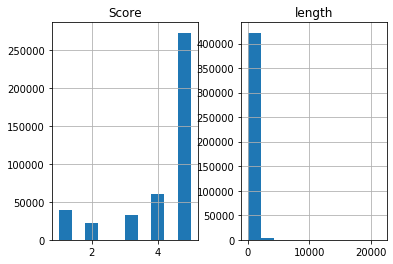

In [12]:
df.hist()
# We need to comment on the graph below, Basically the data is biased towards score 5 . 

In [13]:
df.groupby('Score').describe()

length                                                            
          count        mean         std   min    25%    50%    75%      max
Score                                                                      
1       39193.0  501.748067  516.598898  25.0  224.0  363.0  592.0  10345.0
2       22353.0  515.026887  453.662171  68.0  235.0  384.0  632.0   9315.0
3       31993.0  545.655112  521.450675  51.0  236.0  400.0  684.0  21535.0
4       60309.0  522.622212  490.956654  55.0  217.0  373.0  654.0  12563.0
5      272492.0  425.316017  413.078941  23.0  190.0  300.0  507.0  16991.0

In [14]:
# We can conclude from the table above, that the distributions is not equal, text with ratings 5 are far more than any other score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD479AFE88>,
      dtype=object)

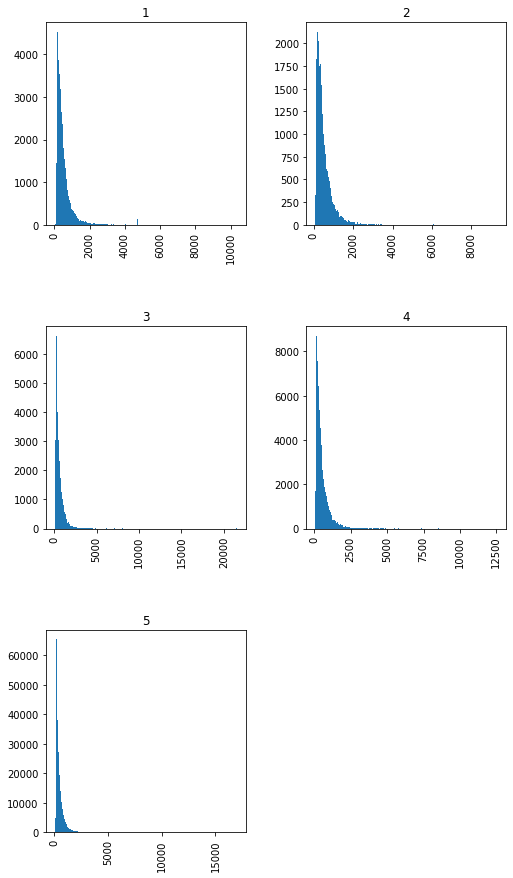

In [15]:
df.hist(column='length',by='Score',bins=200,figsize=(8,15))

In [16]:
# We need to write the conclustion for the graph
#ALso feel free to add whatever graph you like so we can visualize the data as much as we can


# 2 - Text Processing and Normalization: (20%)
Thoroughly experiment with different text processing and normalization alternatives. Explain the
trade-off and benefits of using each and justify their effectiveness for the current data set.

In [38]:
import string

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.corpus import stopwords

In [103]:
#stopwords.words('english')

In [104]:
#This function will remove punc and stopwords
def text_process(text):
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]


In [ ]:
#df['text'].apply(text_process) # Note: Very Compute intenstive process

In [17]:
# NOTE TO SELF : Need to trip down the data (Create MVP1)
#new_df = df['text'].head(1000) 

# Vector space Model and feature representation: (20%)
Experiment with different representation techniques. Document your findings and make
conclusions. Show how choosing n-gram features can influence your results

In [18]:
#Create Bag of words with CountVectorizer...

In [19]:
#TFIDF presentations, Focus on trying allot of things, Cosine similarity, and draw conclusion 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer